#

In [1]:
import xlrd
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
#%%

etting positive and negative words from LoughranMcDonald_sentiwordlist excell file

In [2]:
workbook = xlrd.open_workbook('wordlist.xlsx')
positive_sheet = workbook.sheet_by_name('Positive')
negative_sheet= workbook.sheet_by_name('Negative')
Positive_Word=list()
Negative_Word=list()
for row in range(357):
    Positive_Word.append(positive_sheet.cell(row, 0).value.lower())

In [3]:
for row in range(2361):
    Negative_Word.append(negative_sheet.cell(row,0).value.lower())
    
#adding negation words
Negation = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

%

In [4]:
def FindScore(words):
    score=0
    for word in words:
        if word.lower() in Positive_Word:
            score+=2
        elif word.lower() in Negative_Word:
            score-=2
    return score

In [5]:
def Normalize(scorelist):
    #lower=min(scorelist)
    #upper=max(scorelist)
    #dif=upper-lower
    for i in range(len(scorelist)):
        #scorelist[i]=2*(scorelist[i]-lower)/dif
        #scorelist[i]-=1
        if scorelist[i]>=2:
            scorelist[i]=3
        elif scorelist[i]>=0:
            scorelist[i]=2
        else:
            scorelist[i]=1

%<br>
eading  news data from csv file

In [6]:
data = pd.read_csv("stock.csv", encoding= 'unicode_escape')

alculating Sentiment score

In [7]:
sentiment_scores=list()
news_list=list()
for news in data['news'].values:
    news_list.append(news)
    words=news.split()
    score=FindScore(words)
    #print(score)
    sentiment_scores.append(score)
    
Normalize(sentiment_scores)
    

reating Dataframe

In [8]:
data_clean=pd.DataFrame({"news":news_list,"score":sentiment_scores
        })
    

In [9]:
   
   #%%
#Plotting Dataset    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

c:\users\ishwar\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ishwar\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


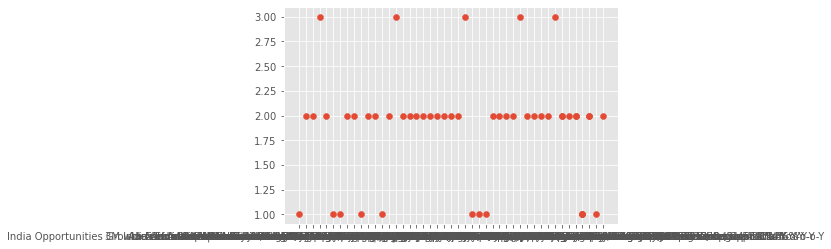

In [10]:
plt.scatter(data_clean['news'].values[:50],data_clean['score'].values[:50])
plt.show()

   #%% 
    #%%
#Preprocessing of dataset-Tfidf vectorization,stop-word removal
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data_clean['news'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X= vectorizer.fit_transform(desc)
word_features = vectorizer.get_feature_names()
#print(word_features)

%<br>
pliting dataset in 70-30 ratio

In [11]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=1)
Y_train, Y_test= train_test_split(data_clean['score'].values, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
# l=np.array(X_train.todense()[:,0])
# l1=l.reshape(-1)
# x2=np.array(X_train.todense()[:,1])
# l2=x2.reshape(-1)
# y=Y_train
# y=y.reshape(-1,1)
# print(l1.ndim)

(737, 2258) (737,) (316, 2258) (316,)


%<br>
reating SVM model and training on train data

In [12]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, Y_train) 

rediction and calculating accuracy

In [13]:
svm_predictions = svm_model_linear.predict(X_test) 
#%%

In [14]:
accuracy_on_training_dataset= svm_model_linear.score(X_train, Y_train) 
accuracy_on_testing_dataset = svm_model_linear.score(X_test, Y_test) 

In [15]:
from sklearn.metrics import classification_report
import seaborn as sn

              precision    recall  f1-score   support

         Buy       0.68      0.48      0.56        71
        Hold       0.81      0.93      0.87       225
        Sell       1.00      0.45      0.62        20

    accuracy                           0.80       316
   macro avg       0.83      0.62      0.68       316
weighted avg       0.80      0.80      0.78       316



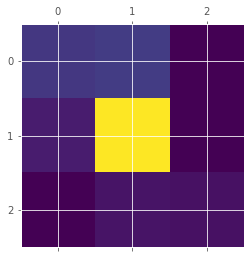

In [16]:
target_names = ['Buy', 'Hold', 'Sell']
print(classification_report(Y_test, svm_predictions, target_names=target_names))
cm=confusion_matrix(Y_test,svm_predictions)
plt.matshow(cm)

%

confusion matrix: [[ 34  37   0]
 [ 16 209   0]
 [  0  11   9]]


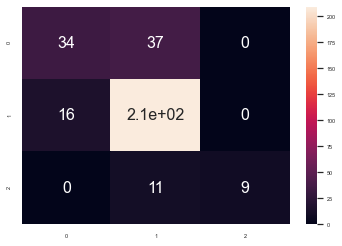

training data set accuracy for svm: 96.74355495251018 %
testing data set accuracy for svm: 79.74683544303798 %


In [17]:
print("confusion matrix:",cm)
sn.set(font_scale=0.5)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()
print("training data set accuracy for svm:",accuracy_on_training_dataset*100,"%")
print("testing data set accuracy for svm:",accuracy_on_testing_dataset*100,"%")

%<br>
ECISION TREE

In [18]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [19]:
training_dt= dtree_model.score(X_train, Y_train) 
testing_dt=dtree_model.score(X_test, Y_test)

              precision    recall  f1-score   support

         Buy       0.55      0.45      0.50        71
        Hold       0.80      0.89      0.84       225
        Sell       1.00      0.40      0.57        20

    accuracy                           0.76       316
   macro avg       0.78      0.58      0.64       316
weighted avg       0.76      0.76      0.75       316



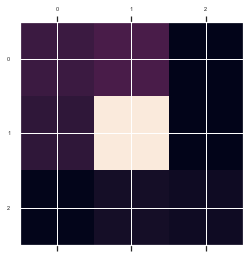

In [20]:
target_names = ['Buy', 'Hold', 'Sell']
print(classification_report(Y_test, dtree_predictions, target_names=target_names))
cm=confusion_matrix(Y_test,dtree_predictions)
plt.matshow(cm)

confusion matrix: [[ 32  39   0]
 [ 25 200   0]
 [  1  11   8]]


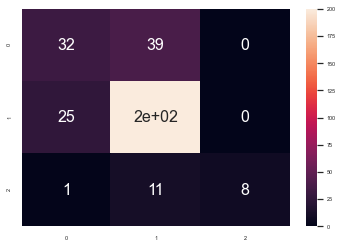

training data set accuracy for decision tree: 76.79782903663501 %
testing data set accuracy for decision tree: 75.9493670886076 %


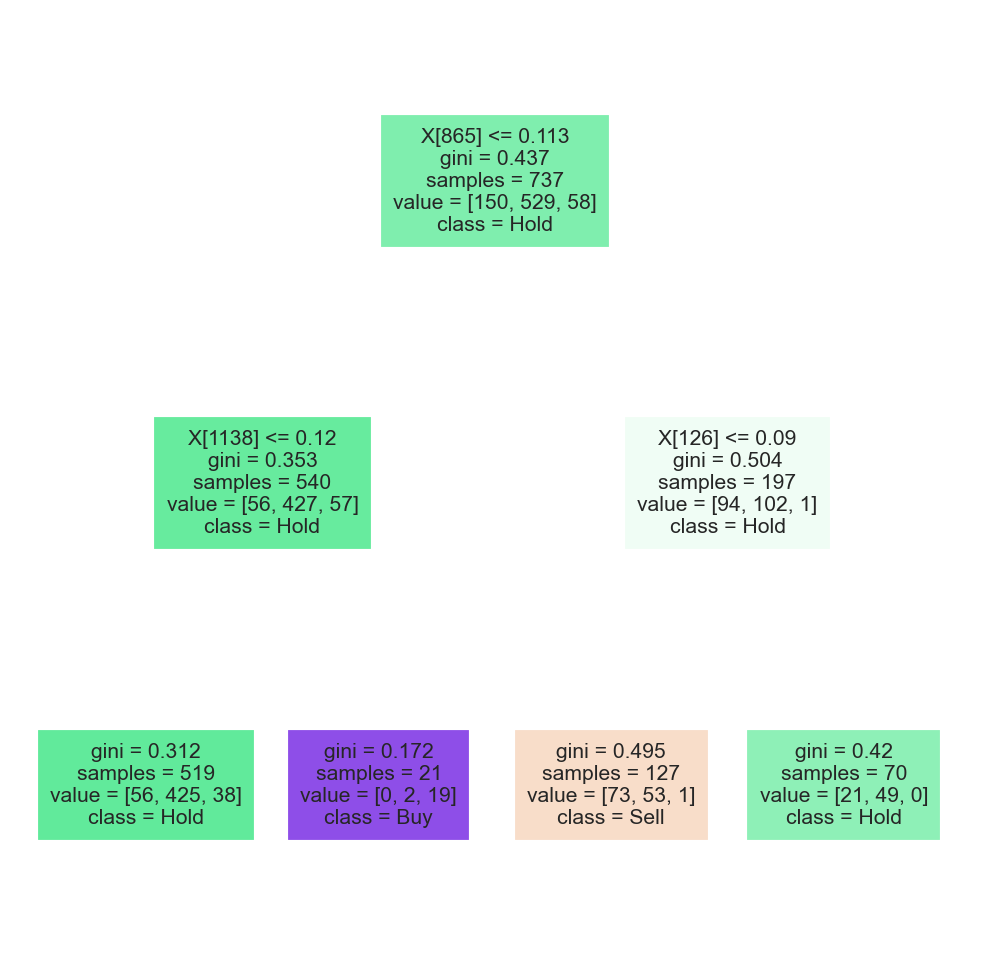

In [21]:
print("confusion matrix:",cm)
sn.set(font_scale=0.5)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()
print("training data set accuracy for decision tree:",training_dt*100,"%")
print("testing data set accuracy for decision tree:",testing_dt*100,"%")
from sklearn import tree
fn=word_features
cn=['Sell','Hold','Buy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree_model, 
               class_names = cn,
               filled = True);
fig.savefig('imagename.png')
#%%
#NAIVE BAYES

In [22]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train.todense(), Y_train) 
gnb_predictions = gnb.predict(X_test.todense())

In [23]:
training_nb= gnb.score(X_train.todense(), Y_train) 
testing_nb=gnb.score(X_test.todense(), Y_test)

              precision    recall  f1-score   support

         Buy       0.50      0.44      0.47        71
        Hold       0.77      0.81      0.79       225
        Sell       0.24      0.20      0.22        20

    accuracy                           0.69       316
   macro avg       0.50      0.48      0.49       316
weighted avg       0.67      0.69      0.68       316



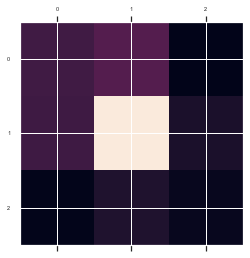

In [24]:
target_names = ['Buy', 'Hold', 'Sell']
print(classification_report(Y_test, gnb_predictions, target_names=target_names))
cm=confusion_matrix(Y_test,gnb_predictions)
plt.matshow(cm)

confusion matrix: [[ 31  40   0]
 [ 30 182  13]
 [  1  15   4]]


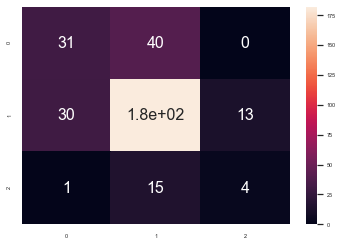

training data set accuracy for Naive Bayes: 99.59294436906377 %
testing data set accuracy for Naive Bayes: 68.67088607594937 %


In [25]:
print("confusion matrix:",cm)
sn.set(font_scale=0.5)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()
print("training data set accuracy for Naive Bayes:",training_nb*100,"%")
print("testing data set accuracy for Naive Bayes:",testing_nb*100,"%")